# Pryngles module: stars

In [3]:
from pryngles import *

## External modules

In [4]:
sci=Science
print_df=Misc.print_df

## Star Class

In [7]:
"""
These are the default attributes for bodies of the kind 'Star'.

DEVELOPER:
    You may add new attributes as the model gets more complex.
    Please document properly each attribute.

"""
STAR_DEFAULTS=odict(

    #Orbit
    m=1,
    
    #Physics
    radius=1,
    prot=1,
    i=0, #Inclination of the rotational axis
    roll=0,
    alpha=0, #Zero meridian
    t0=0,
    
    #Optical properties
    nspangles=1000,
    limb_coeffs=[],
)

In [8]:
BODY_KINDS+=["Star"]
class Star(Body):
    """A star.

    Initialization attributes:
        
        primary: Class Body, default = None:
            Object in the center of the orbit of the star for specification purposes.

            If None the object is the center of the orbit specification for other objects.
            
            Object primary for a star should be another star.
        
        orbit:

            These attributes should be compatible with rebound.

            m: float [um], default = 1: 
                Mass of the star. It should be different than zero.

        physics:

            radius: float [ul], default = 1:
                Radius of the star.

            prot: float [ut], default = 1:
                Period of rotation of the star.
                
            i: float [rad], default = 0:
                Inclination of the ring with respect to the ecliptic plane.

            roll: float [rad], default = 0:
                Roll angle.  This is the angle with respect to ecliptic x-axis in which 
                the normal to the ring plane is rotated.
                
            alpha_equ: float [rad], default = 0:
                Longitude of the zero meridian of the object.
                
            t0: float [ut], default = 0:
                Initial time for zero meridian.

        optics:

            nspangles: int, default = 1000:
                Number of spangles on which the star will be discretized.

            limb_coeffs: list [adimensional], default = []
                List of limb darkening fit coefficients.  See Science.calc_limbdarkening.
                
                Models in: https://pages.jh.edu/~dsing3/David_Sing/Limb_Darkening.html
                Coefficients available at: https://pages.jh.edu/~dsing3/LDfiles/LDCs.CoRot.Table1.txt

    Derived attributes:
    
            wrot: float [rad/ut]:
                Rotational angular velocity.
                
            n_equ: array(3):
                Rotational axis vector.
    
    Methods:
    
        update_body(**pars):

            This method compute some derived attributes like.

    Notes:

        See Body class documentation.
    
    """
    def __init__(self,
                 primary=None,
                 **props
                ):
        
        
        #Instantiate object with basic properties
        Body.__init__(self,"Star",STAR_DEFAULTS,primary)

        #Check primary
        if self.primary is not None:
            if self.primary.kind!="Star":
                raise ValueError(f"Only another Star can be the primary of a Star")
                
        #Update properties
        self.update_body(**props)
        
    def update_body(self,**props):
        Body.update_body(self,**props)
        
        #Update physics
        
        #Rotational angular velocity
        self.wrot=2*np.pi/self.prot
        
        #Rotation axis
        self.n_equ=sci.cartesian([1,self.roll,90*Consts.deg-self.i])

In [15]:
if IN_JUPYTER:
    def test_star(self):
        
        Verbose.VERBOSITY=VERB_ALL
        
        S=Star()
        print(S.physics)
        print(S.hash)
        
        #Check derived properties
        self.assertEqual(np.isclose([S.physics.wrot],
                                    [2*np.pi/StarDefaults.physics["prot"]],
                                    rtol=1e-7),
                         [True]*1)
        
        S.update_body(physics=dict(m=2))
        print(S.physics)
        
        #Check exception: primary could not be different from None or Body
        self.assertRaises(AssertionError,lambda:Star(primary="Nada"))
        
        Verbose.VERBOSITY=VERB_NONE

    class Test(unittest.TestCase):pass    
    Test.test_star=test_star
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.

{'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}
8779939588976
{'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'm': 2}



----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [16]:
def spangle_body(self,seed=0,preset=False):
    """
    Spangle the surface of the star
    """
    
    #Create spangler
    self.sp=Spangler(
        nspangles=self.optics.nspangles,
        body_hash=self.hash,
        spangle_type=STAR_SPANGLE,
        n_equ=self.physics.n_equ,
        alpha_equ=self.physics.alpha,
        w_equ=self.physics.wrot,
        t0_equ=self.physics.t0,
    )
    
    #Populate spangler
    self.sp.populate_spangler(
        scale=self.physics.radius,
        seed=seed,
        geometry="sphere",
        preset=preset
    )

Star.spangle_body=spangle_body

  VERB1::set_positions:: Setting positions
      VERB3::set_positions:: Generating equatorial transformation matrices from n_equ = [6.123234e-17 0.000000e+00 1.000000e+00]
      VERB3::rotation_matrix:: Rotation axis: [0. 1. 0.] [-1.000000e+00  0.000000e+00  6.123234e-17] [6.123234e-17 0.000000e+00 1.000000e+00]
      VERB3::set_positions:: Updating center in {equ} to [0, 0, 0]
      VERB3::set_positions:: Updating center {ecl} to [0, 0, 0]
  VERB1::set_observer:: Setting observer
      VERB3::set_observer:: Generating observer matrices from n_obs = [0. 0. 1.]
      VERB3::rotation_matrix:: Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
  VERB1::update_visibility:: Updating visibility
  VERB1::set_luz:: Setting light-source
      VERB3::set_luz:: Generating light-source matrices from n_luz = [0. 0. 1.]
      VERB3::rotation_matrix:: Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
  VERB1::update_illumination:: Updating illumination
  VERB1::populate_spangler:: Populating spangler from prese

,body_hash,type,dim,scale,center_ecl,x_ecl,y_ecl,z_ecl,r_ecl,q_ecl,f_ecl,ns_ecl,x_obs,y_obs,z_obs,r_obs,q_obs,f_obs,ns_obs,x_luz,y_luz,z_luz,r_luz,q_luz,f_luz,ns_luz,n_equ,alpha_equ,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,w,t0,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,visible,shadow,illuminated,transit,indirect,occult,emit,hidden
1195,8779922100896,3,3,1,"[0, 0, 0]",-0.063410,0.104513,0.992500,1.0,2.116141,1.448245,"[-0.06340982984396312, 0.10451288666551765, 0.9925000000000002]",-0.063410,0.104513,0.992500,1.0,2.116141,1.448245,"[-0.06340982984396312, 0.10451288666551765, 0.9925000000000002]",-0.063410,0.104513,0.992500,1.0,2.116141,1.448245,"[-0.06340982984396312, 0.10451288666551765, 0.9925000000000002]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.104513,0.063410,0.992500,1.0,0.545344,1.448245,"[0.10451288666551765, 0.06340982984396318, 0.9925000000000002]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1196,8779922100896,3,3,1,"[0, 0, 0]",-0.021035,-0.105784,0.994167,1.0,4.516104,1.462731,"[-0.021034582383312753, -0.10578367186313857, 0.9941666666666669]",-0.021035,-0.105784,0.994167,1.0,4.516104,1.462731,"[-0.021034582383312753, -0.10578367186313857, 0.9941666666666669]",-0.021035,-0.105784,0.994167,1.0,4.516104,1.462731,"[-0.021034582383312753, -0.10578367186313857, 0.9941666666666669]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.105784,0.021035,0.994167,1.0,2.945308,1.462731,"[-0.10578367186313857, 0.021034582383312815, 0.9941666666666669]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1197,8779922100896,3,3,1,"[0, 0, 0]",0.073530,0.053937,0.995833,1.0,0.632882,1.479478,"[0.07353046909038714, 0.05393739275835858, 0.9958333333333336]",0.073530,0.053937,0.995833,1.0,0.632882,1.479478,"[0.07353046909038714, 0.05393739275835858, 0.9958333333333336]",0.073530,0.053937,0.995833,1.0,0.632882,1.479478,"[0.07353046909038714, 0.05393739275835858, 0.9958333333333336]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.053937,-0.073530,0.995833,1.0,5.345271,1.479478,"[0.05393739275835858, -0.07353046909038709, 0.9958333333333336]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1198,8779922100896,3,3,1,"[0, 0, 0]",-0.070249,0.007670,0.997500,1.0,3.032845,1.500071,"[-0.07024903015177654, 0.007669665099252431, 0.9975]",-0.070249,0.007670,0.997500,1.0,3.032845,1.500071,"[-0.07024903015177654, 0.007669665099252431, 0.9975]",-0.070249,0.007670,0.997500,1.0,3.032845,1.500071,"[-0.07024903015177654, 0.007669665099252431, 0.9975]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.007670,0.070249,0.997500,1.0,1.462049,1.500071,"[0.007669665099252431, 0.0702490301517766, 0.9975]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1199,8779922100896,3,3,1,"[0, 0, 0]",0.026927,-0.030675,0.999167,1.0,5.432808,1.529969,"[0.026926524735695796, -0.0306746554647327, 0.9991666666666668]",0.026927,-0.030675,0.999167,1.0,5.432808,1.529969,"[0.026926524735695796, -0.0306746554647327, 0.9991666666666668]",0.026927,-0.030675,0.999167,1.0,5.432808,1.529969,"[0.026926524735695796, -0.0306746554647327, 0.9991666666666668]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.030675,-0.026927,0.999167,1.0,3.862012,1.529969,"[-0.0306746554647327, -0.026926524735695734, 0.9991666666666668]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>


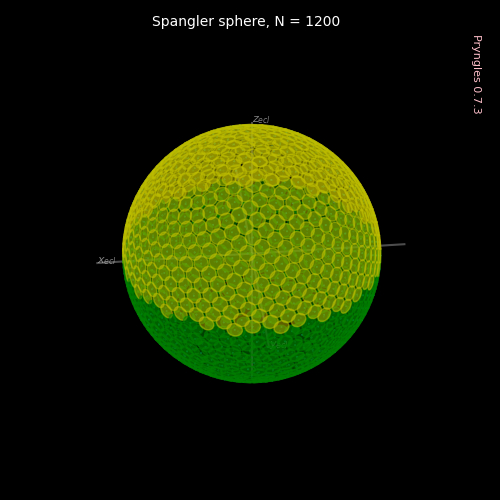

.
----------------------------------------------------------------------
Ran 1 test in 0.957s

OK


In [17]:
if IN_JUPYTER:
    def test_sp(self):
        
        Verbose.VERBOSITY=VERB_ALL
        
        S=Star(optics=dict(nspangles=1270))
        S.spangle_body(preset=True)
        print_df(S.sp.data.tail())
        S.sp.plot3d()
        
        Verbose.VERBOSITY=VERB_NONE
        
    class Test(unittest.TestCase):pass    
    Test.test_sp=test_sp
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

--End--